In [3]:
from google.colab import files
uploaded = files.upload()


Saving AEP_hourly.csv to AEP_hourly.csv


              Datetime   AEP_MW
0  2004-12-31 01:00:00  13478.0
1  2004-12-31 02:00:00  12865.0
2  2004-12-31 03:00:00  12577.0
3  2004-12-31 04:00:00  12517.0
4  2004-12-31 05:00:00  12670.0

Missing values:
 AEP_MW    0
dtype: int64


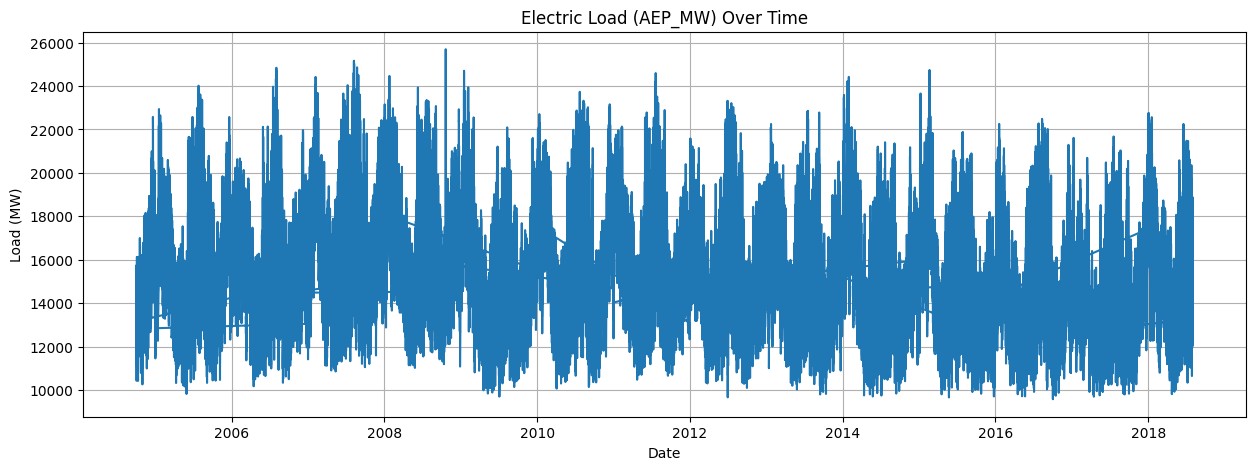


Mean Absolute Error (MAE): 424.94 MW
Root Mean Square Error (RMSE): 664.81 MW


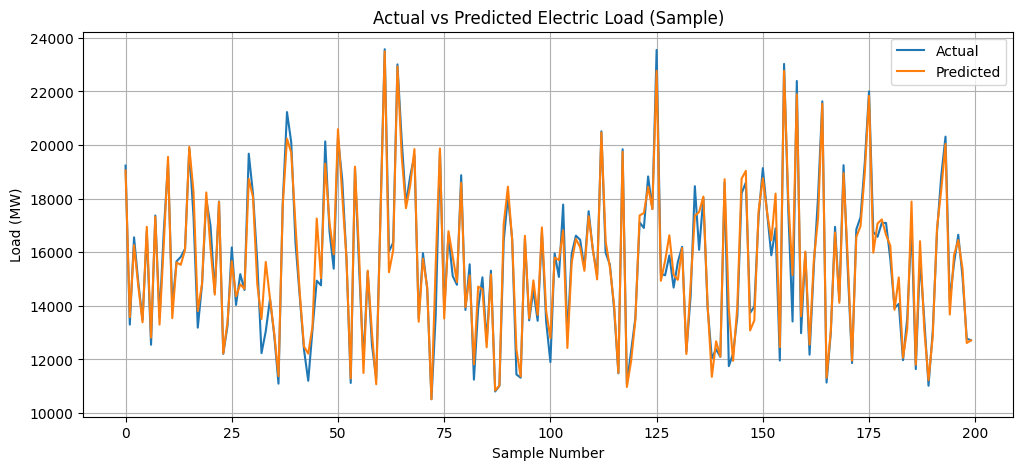

In [4]:
# 📦 Install & Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 📥 Load Uploaded Dataset
data = pd.read_csv('AEP_hourly.csv')

# 📌 View first few rows
print(data.head())

# 📌 Convert 'Datetime' column to datetime type
data['Datetime'] = pd.to_datetime(data['Datetime'])

# 📌 Set 'Datetime' as the index
data.set_index('Datetime', inplace=True)

# 📌 Check for missing values
print("\nMissing values:\n", data.isnull().sum())

# 📌 Drop rows with missing values (if any)
data.dropna(inplace=True)

# 📊 Plot Load Data
plt.figure(figsize=(15,5))
plt.plot(data['AEP_MW'])
plt.title('Electric Load (AEP_MW) Over Time')
plt.xlabel('Date')
plt.ylabel('Load (MW)')
plt.grid(True)
plt.show()

# 📌 Feature Engineering: Extract time-based features
data['Hour'] = data.index.hour
data['Day'] = data.index.day
data['Month'] = data.index.month
data['Year'] = data.index.year

# 📦 Define Features (X) and Target (y)
X = data[['Hour', 'Day', 'Month', 'Year']]
y = data['AEP_MW']

# 📊 Split Data into Training and Testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔍 Initialize and Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 📈 Predict on Test Data
y_pred = model.predict(X_test)

# 📊 Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nMean Absolute Error (MAE): {mae:.2f} MW")
print(f"Root Mean Square Error (RMSE): {rmse:.2f} MW")

# 📉 Plot Actual vs Predicted Load (Sample of 200 points)
plt.figure(figsize=(12,5))
plt.plot(y_test.values[:200], label='Actual')
plt.plot(y_pred[:200], label='Predicted')
plt.title('Actual vs Predicted Electric Load (Sample)')
plt.xlabel('Sample Number')
plt.ylabel('Load (MW)')
plt.legend()
plt.grid(True)
plt.show()
